In [188]:
import numpy as np
import matplotlib.pyplot as plt
import constants as c

In [127]:
# Load Data
data_metrics = np.load('Outputs/T1_metrics.npy')
data_Spks = np.load('Outputs/T1_Spks.npy', allow_pickle=True)
data_Spks_tot = np.load('Outputs/T1_Spks_tot.npy')
data_Mems = np.load('Outputs/T1_Mems.npy', allow_pickle=True)
data_Mems_tot = np.load('Outputs/T1_Mems_tot.npy')

# Compute the Sum over the 3 Layers of the Spikes and Mem Potential
data_Spks_tot_tot = np.sum(data_Spks_tot, axis=1)
data_Mems_tot_tot = np.sum(data_Mems_tot, axis=1)

In [128]:
# Load data more than 1 surrogate function

data_metrics_grads = []
data_Spks_tot_grads = []
data_Spks_tot_tot_grads = []

for surr_func in c.SURR_FUNCTIONS:
    data_metrics_grads.append(np.load(f'Outputs/metrics_{surr_func}.npy'))
    data_Spks_tot_grads.append(np.load(f'Outputs/Spks_tot_{surr_func}.npy'))
    # Compute the Sum over the 3 Layers of the Spikes and Mem Potential
    data_Spks_tot_tot_grads.append(np.sum(data_Spks_tot_grads[-1], axis=1))

In [ ]:
# Prints
# print(np.array(data_Spks.item().get('s1')[0]))
# print(data_Spks_tot)
print(data_metrics[0][2])

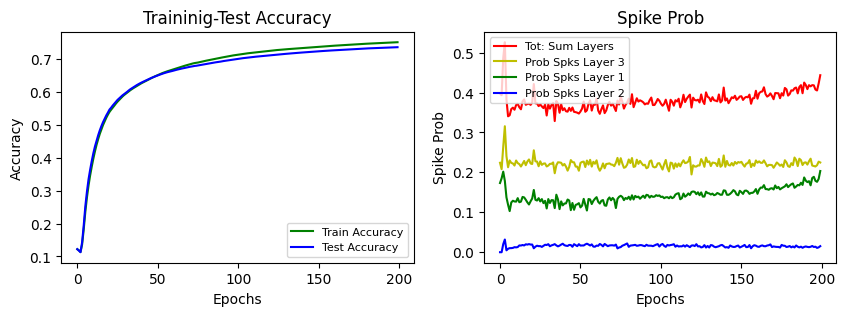

In [129]:
# Plots
epochs = range(0, len(data_metrics[0][0]))

fig, axes = plt.subplots(1,2, figsize=(10,3))

axes[0].plot(epochs, data_metrics[0][2], 'g', label='Train Accuracy')
axes[0].plot(epochs, data_metrics[0][3], 'b', label='Test Accuracy')
axes[1].plot(epochs, data_Spks_tot_tot, 'r', label='Tot: Sum Layers')
axes[1].plot(epochs, data_Spks_tot[:,2], 'y', label='Prob Spks Layer 3')
axes[1].plot(epochs, data_Spks_tot[:,0], 'g', label='Prob Spks Layer 1')
axes[1].plot(epochs, data_Spks_tot[:,1], 'b', label='Prob Spks Layer 2')

axes[0].set_title('Traininig-Test Accuracy')
axes[1].set_title('Spike Prob')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Spike Prob')

axes[0].legend(fontsize=8)
axes[1].legend(fontsize=8)
plt.show()

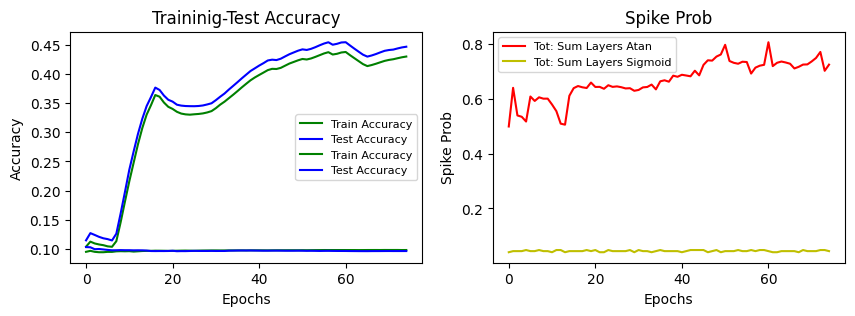

In [130]:
# Plot more than 1 surrogate gradient function 
epochs = range(0, len(data_metrics_grads[0][0][0]))

fig, axes = plt.subplots(1,2, figsize=(10,3))

colors = ['r', 'y']
for i, surr_func in enumerate(c.SURR_FUNCTIONS):
    axes[0].plot(epochs, data_metrics_grads[i][0][2], 'g', label='Train Accuracy')
    axes[0].plot(epochs, data_metrics_grads[i][0][3], 'b', label='Test Accuracy')
    axes[1].plot(epochs, data_Spks_tot_tot_grads[i], f'{colors[i]}', label=f'Tot: Sum Layers {surr_func}')
    # axes[1].plot(epochs, data_Spks_tot_grads[i][:,2], 'y', label='Prob Spks Layer 3')
    # axes[1].plot(epochs, data_Spks_tot_grads[i][:,0], 'g', label='Prob Spks Layer 1')
    # axes[1].plot(epochs, data_Spks_tot_grads[i][:,1], 'b', label='Prob Spks Layer 2')

axes[0].set_title('Traininig-Test Accuracy')
axes[1].set_title('Spike Prob')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Spike Prob')

axes[0].legend(fontsize=8)
axes[1].legend(fontsize=8)
plt.show()

In [166]:
# Load data to check accuracy vs sparsity correlation, changing Betas


second = False
other = ''
if second:
    other = '_2'

Accs_Atan_betas = np.load(f'Accuracy_vs_Sparsity/Accs_Atan_betas{other}.npy')
Accs_Sigmoid_betas = np.load(f'Accuracy_vs_Sparsity/Accs_Sigmoid_betas{other}.npy')

Spks_tot_Atan_betas = np.load(f'Accuracy_vs_Sparsity/Spks_tot_Atan_betas{other}.npy')
Spks_tot_Sigmoid_betas = np.load(f'Accuracy_vs_Sparsity/Spks_tot_Sigmoid_betas{other}.npy')

Spks_tot_tot_Atan_betas = np.array([])
Spks_tot_tot_Sigmoid_betas = np.array([])

for i in range(7):
    Spks_tot_tot_Atan_betas = np.append(Spks_tot_tot_Atan_betas, np.sum(Spks_tot_Atan_betas[i], axis=1))
    Spks_tot_tot_Sigmoid_betas = np.append(Spks_tot_tot_Sigmoid_betas, np.sum(Spks_tot_Sigmoid_betas[i], axis=1))

Spks_tot_tot_Atan_betas = Spks_tot_tot_Atan_betas.reshape((7, np.shape(Spks_tot_Atan_betas)[1]))
Spks_tot_tot_Sigmoid_betas = Spks_tot_tot_Sigmoid_betas.reshape((7, np.shape(Spks_tot_Atan_betas)[1]))

print(f"{np.shape(Spks_tot_Atan_betas)}")
print(f"{np.shape(Spks_tot_tot_Atan_betas)}")

(7, 150, 3)
(7, 150)


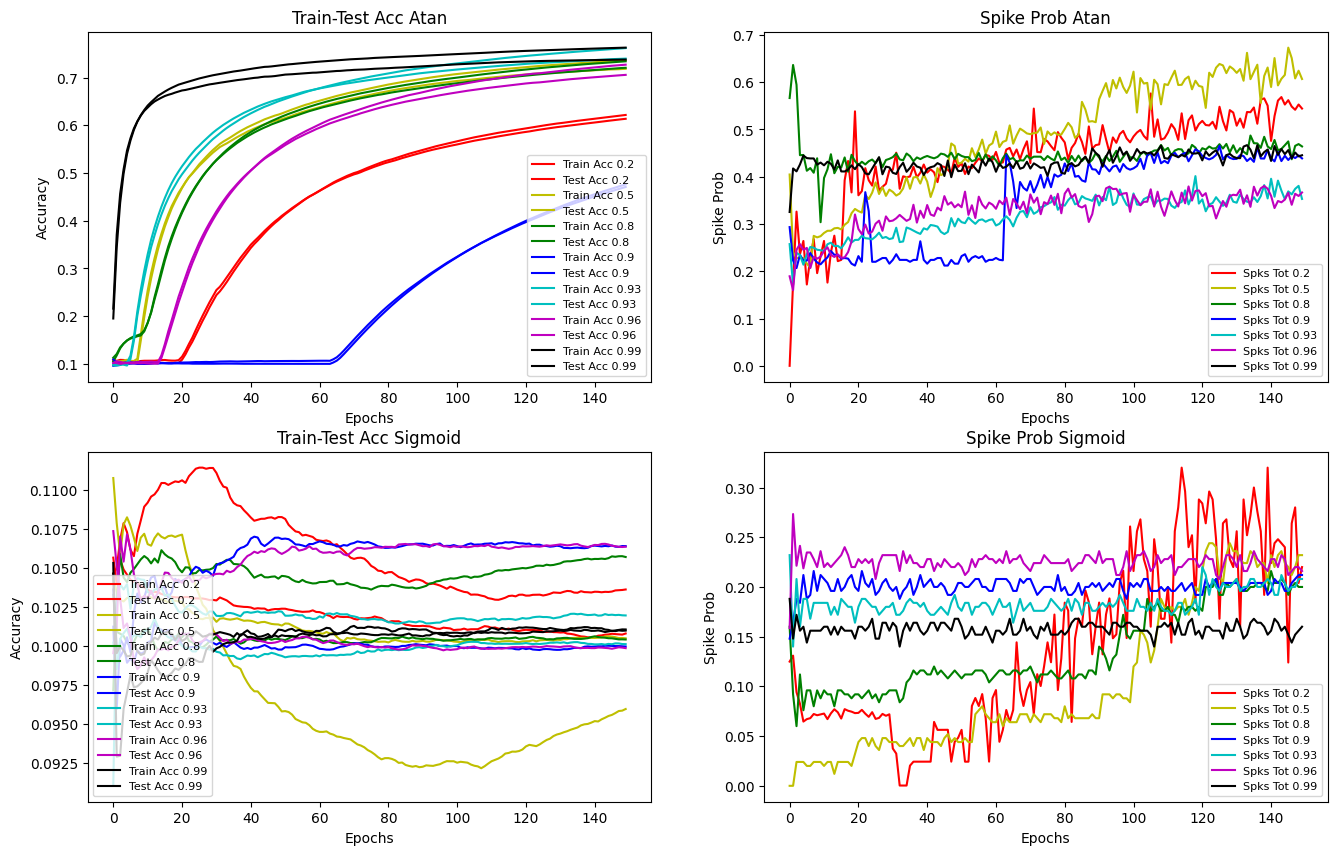

In [167]:
# Plot Sigmoid vs Atan, for betas
epochs = range(np.shape(Spks_tot_Atan_betas)[1])

fig, axes = plt.subplots(2,2, figsize=(16,10))

colors = ['r', 'y', 'g', 'b', 'c', 'm', 'k']
betas = [0.2, 0.5, 0.8, 0.9, 0.93, 0.96, 0.99]

# Atan
for i in range(7):
    axes[0,0].plot(epochs, Accs_Atan_betas[i][0][0], f'{colors[i]}', label=f'Train Acc {betas[i]}')
    axes[0,0].plot(epochs, Accs_Atan_betas[i][0][1], f'{colors[i]}', label=f'Test Acc {betas[i]}')
    axes[0,1].plot(epochs, Spks_tot_tot_Atan_betas[i], f'{colors[i]}', label=f'Spks Tot {betas[i]}')

    axes[1,0].plot(epochs, Accs_Sigmoid_betas[i][0][0], f'{colors[i]}', label=f'Train Acc {betas[i]}')
    axes[1,0].plot(epochs, Accs_Sigmoid_betas[i][0][1], f'{colors[i]}', label=f'Test Acc {betas[i]}')
    axes[1,1].plot(epochs, Spks_tot_tot_Sigmoid_betas[i], f'{colors[i]}', label=f'Spks Tot {betas[i]}')

axes[0,0].set_title('Train-Test Acc Atan')
axes[1,0].set_title('Train-Test Acc Sigmoid')
axes[0,1].set_title('Spike Prob Atan')
axes[1,1].set_title('Spike Prob Sigmoid')
axes[0,0].set_xlabel('Epochs')
axes[0,1].set_xlabel('Epochs')
axes[1,0].set_xlabel('Epochs')
axes[1,1].set_xlabel('Epochs')

axes[0,0].set_ylabel('Accuracy')
axes[1,0].set_ylabel('Accuracy')
axes[0,1].set_ylabel('Spike Prob')
axes[1,1].set_ylabel('Spike Prob')

axes[0,0].legend(fontsize=8)
axes[0,1].legend(fontsize=8)
axes[1,0].legend(fontsize=8)
axes[1,1].legend(fontsize=8)

plt.show()

In [192]:
# Load data to check accuracy vs sparsity correlation, changing surrogate functions coefficient

def preprocess_layer_spks(in1, in2, in3):
    out1 = []
    out2 = []
    out3 = []
    for i in range(np.shape(in1)[0]):
        for j in range(np.shape(in1)[1]):
            out1.append(np.mean(in1[i,j]))
            out2.append(np.mean(in2[i,j]))
            out3.append(np.mean(in3[i,j]))
    out1 = np.array(out1).reshape((np.shape(in1)[0], np.shape(in1)[1]))
    out2 = np.array(out2).reshape((np.shape(in2)[0], np.shape(in2)[1]))
    out3 = np.array(out3).reshape((np.shape(in3)[0], np.shape(in3)[1]))
        
    return out1, out2, out3


Spks_tot_overall = np.load(f'Diff_Surrogates/Spks_tot_overall.npy')

Accs_Atan = np.squeeze(np.load(f'Diff_Surrogates/Accs_Atan.npy'))
Spks_Atan_1 = np.load(f'Diff_Surrogates/Spks_Atan_layer1.npy')
Spks_Atan_2 = np.load(f'Diff_Surrogates/Spks_Atan_layer2.npy')
Spks_Atan_3 = np.load(f'Diff_Surrogates/Spks_Atan_layer3.npy')
Spks_Atan_1, Spks_Atan_2, Spks_Atan_3 = preprocess_layer_spks(Spks_Atan_1, Spks_Atan_2, Spks_Atan_3)

Accs_Sigmoid = np.squeeze(np.load(f'Diff_Surrogates/Accs_Sigmoid.npy'))
Spks_Sigmoid_1 = np.load(f'Diff_Surrogates/Spks_Sigmoid_layer1.npy')
Spks_Sigmoid_2 = np.load(f'Diff_Surrogates/Spks_Sigmoid_layer2.npy')
Spks_Sigmoid_3 = np.load(f'Diff_Surrogates/Spks_Sigmoid_layer3.npy')
Spks_Sigmoid_1, Spks_Sigmoid_2, Spks_Sigmoid_3 = preprocess_layer_spks(Spks_Sigmoid_1, Spks_Sigmoid_2, Spks_Sigmoid_3) 

Accs_FastSigm = np.squeeze(np.load(f'Diff_Surrogates/Accs_FastSigm.npy'))
Spks_FastSigm_1 = np.load(f'Diff_Surrogates/Spks_FastSigm_layer1.npy')
Spks_FastSigm_2 = np.load(f'Diff_Surrogates/Spks_FastSigm_layer2.npy')
Spks_FastSigm_3 = np.load(f'Diff_Surrogates/Spks_FastSigm_layer3.npy')
Spks_FastSigm_1, Spks_FastSigm_2, Spks_FastSigm_3 = preprocess_layer_spks(Spks_FastSigm_1, Spks_FastSigm_2, Spks_FastSigm_3)


Accs = [Accs_Atan, Accs_Sigmoid, Accs_FastSigm]
Spks_1 = [Spks_Atan_1, Spks_Sigmoid_1, Spks_FastSigm_1]
Spks_2 = [Spks_Atan_2, Spks_Sigmoid_2, Spks_FastSigm_2]
Spks_3 = [Spks_Atan_3, Spks_Sigmoid_3, Spks_FastSigm_3]

print(f"{np.shape(Accs_Sigmoid)}")
print(f"{np.shape(Spks_Atan_2)}")
print(f"{np.shape(Spks_tot_overall)}")

(3, 2, 250)
(3, 250)
(9,)


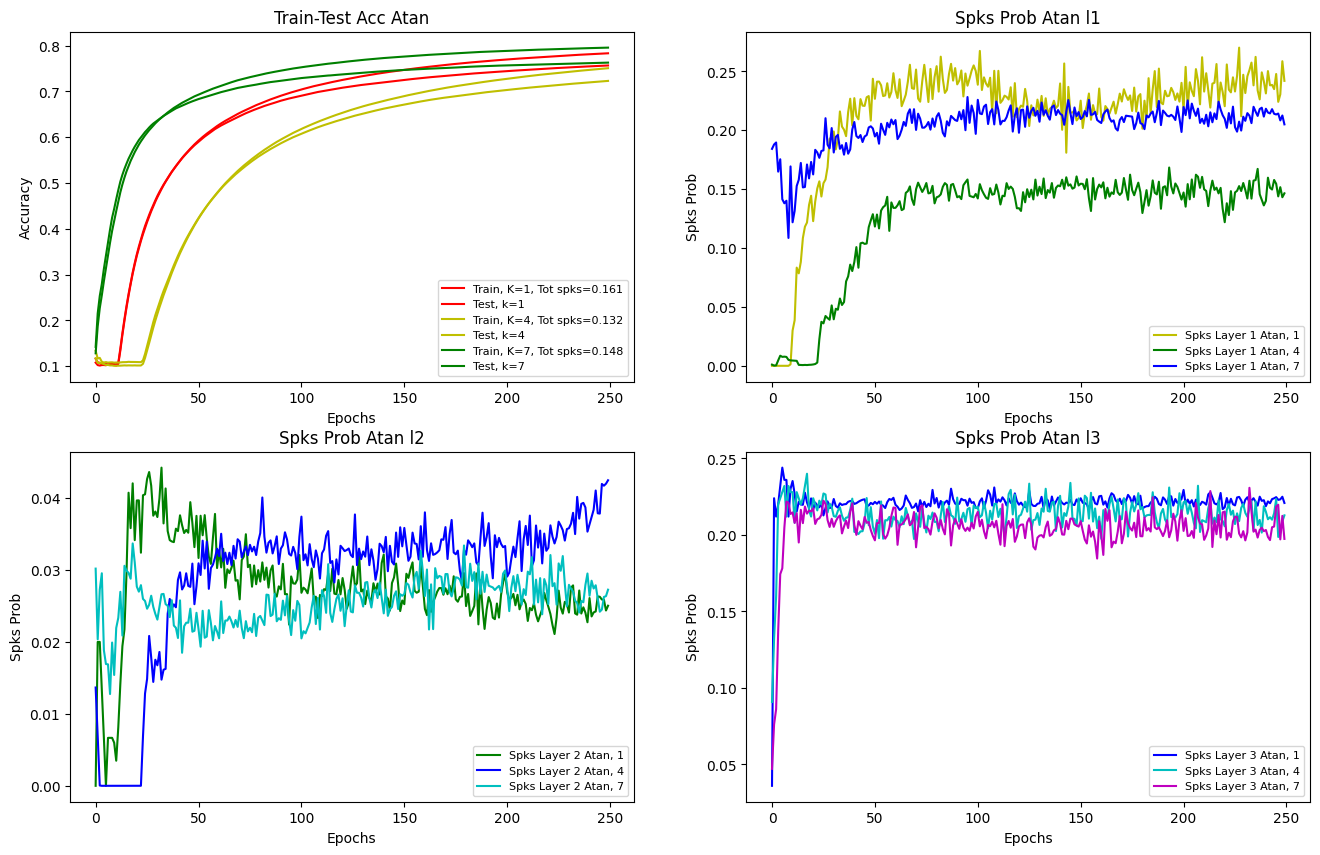

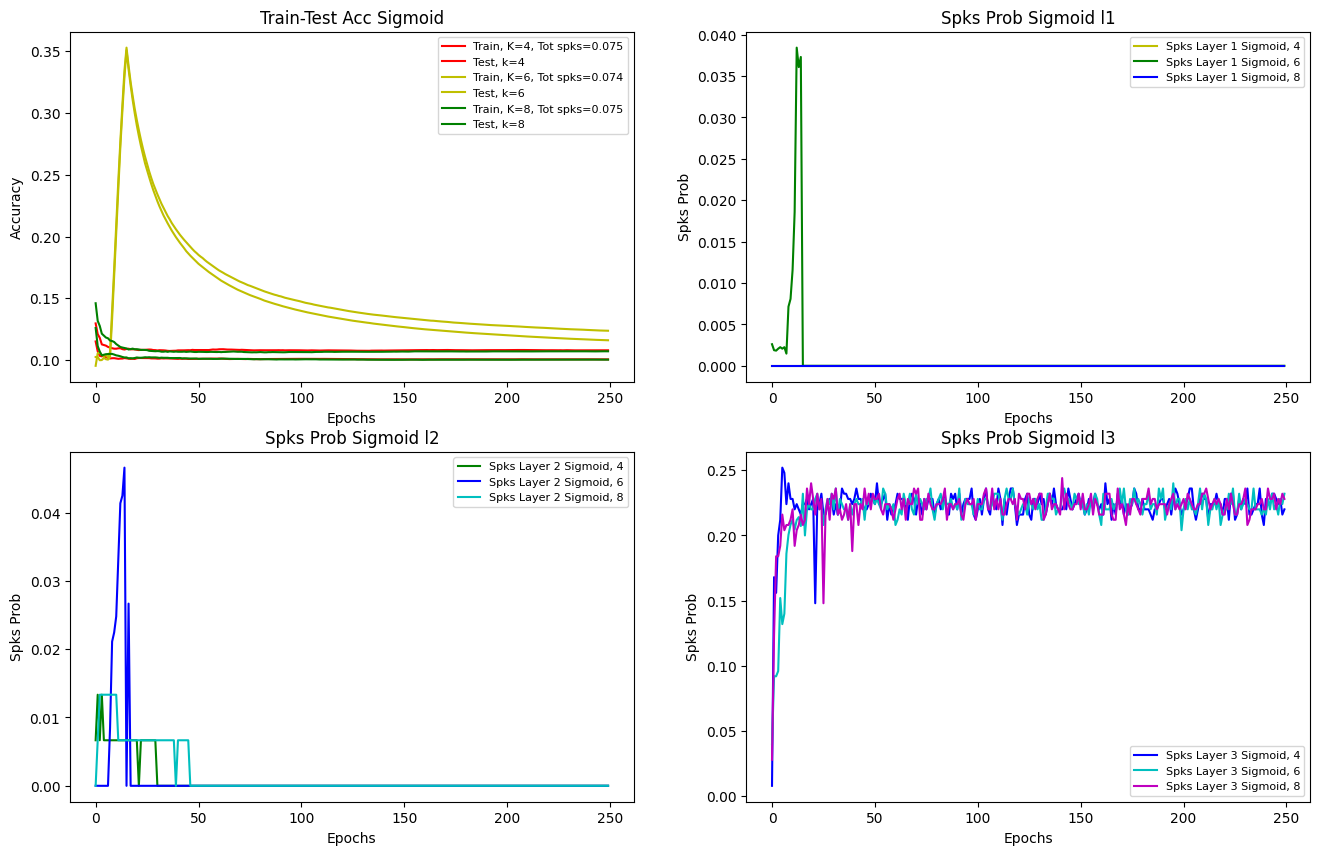

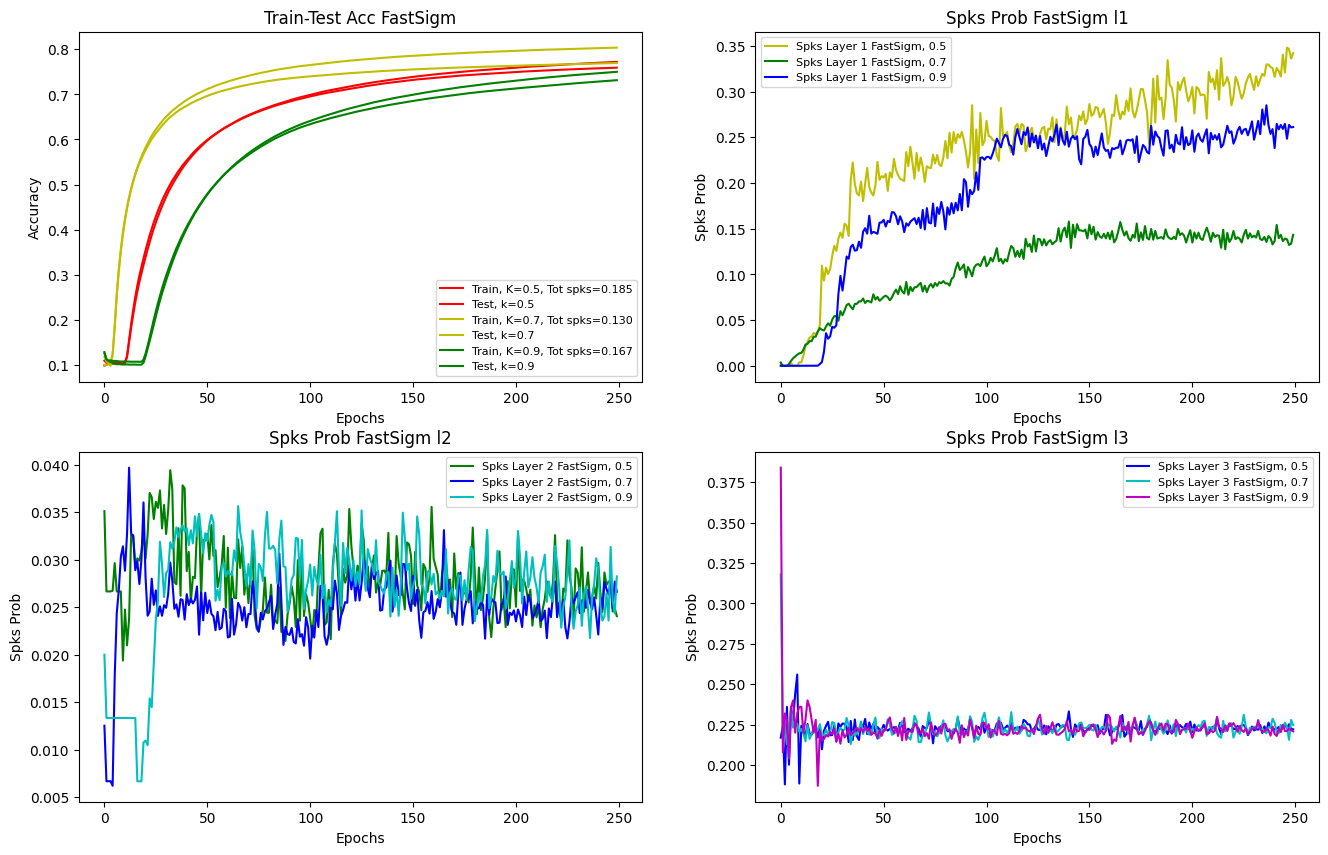

In [195]:
# Plot Atan vs Sigmoid vs Fast-Sigmoid, for slope coefficient
 
epochs = range(np.shape(Spks_Atan_1)[1])

colors = ['r', 'y', 'g', 'b', 'c', 'm', 'k']
SURR_NAMES = ['Atan', 'Sigmoid', 'FastSigm']
SURR_SLOPES = {'Atan': [1, 4, 7], 'Sigmoid': [4, 6, 8], 'FastSigm': [0.5, 0.7, 0.9]}


def plot_per_slope(index_surr: int):
    
    fig, axes = plt.subplots(2,2, figsize=(16,10))
    # loop over the 3 slopes
    for i in range(np.shape(Spks_Atan_1)[0]):
        axes[0,0].plot(epochs, Accs[index_surr][i][0], f'{colors[i]}', 
                       label=f'Train, K={SURR_SLOPES[SURR_NAMES[index_surr]][i]}, Tot spks={Spks_tot_overall[3*index_surr+i]:.3f}')
        axes[0,0].plot(epochs, Accs[index_surr][i][1], f'{colors[i]}', 
                       label=f'Test, k={SURR_SLOPES[SURR_NAMES[index_surr]][i]}')
        axes[0,1].plot(epochs, Spks_1[index_surr][i], f'{colors[i+1]}', 
                       label=f'Spks Layer 1 {SURR_NAMES[index_surr]}, {SURR_SLOPES[SURR_NAMES[index_surr]][i]}')
        axes[1,0].plot(epochs, Spks_2[index_surr][i], f'{colors[i+2]}', 
                       label=f'Spks Layer 2 {SURR_NAMES[index_surr]}, {SURR_SLOPES[SURR_NAMES[index_surr]][i]}')
        axes[1,1].plot(epochs, Spks_3[index_surr][i], f'{colors[i+3]}', 
                       label=f'Spks Layer 3 {SURR_NAMES[index_surr]}, {SURR_SLOPES[SURR_NAMES[index_surr]][i]}')

    axes[0,0].set_title(f'Train-Test Acc {SURR_NAMES[index_surr]}')
    axes[0,1].set_title(f'Spks Prob {SURR_NAMES[index_surr]} l1')
    axes[1,0].set_title(f'Spks Prob {SURR_NAMES[index_surr]} l2')
    axes[1,1].set_title(f'Spks Prob {SURR_NAMES[index_surr]} l3')
    axes[0,0].set_xlabel('Epochs')
    axes[0,1].set_xlabel('Epochs')
    axes[1,0].set_xlabel('Epochs')
    axes[1,1].set_xlabel('Epochs')

    axes[0,0].set_ylabel('Accuracy')
    axes[0,1].set_ylabel('Spks Prob')
    axes[1,0].set_ylabel('Spks Prob')
    axes[1,1].set_ylabel('Spks Prob')

    axes[0,0].legend(fontsize=8)
    axes[0,1].legend(fontsize=8)
    axes[1,0].legend(fontsize=8)
    axes[1,1].legend(fontsize=8)


for index in range(np.shape(Spks_Atan_1)[0]):
    plot_per_slope(index_surr=index)

plt.show()

